<a href="https://colab.research.google.com/github/fhsmartins/MBA/blob/main/Aula03/AULA_37_VALIDACAO_AGRUPAMENTO_PRATICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red"> MBA em IA e Big Data</font>
## <span style="color:red">Curso 2 - Ciência de Dados, Aprendizado de Máquina e Mineração de Dados</span>

### <span style="color:darkred">Mineração de Dados</span>

#### Material de Apoio - Prática sobre Validação de Agrupamentos (ver Vídeo)

*Ricardo M. Marcacini*<br>
*ICMC/USP São Carlos*

# Importando Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import scipy
from scipy.spatial import distance_matrix
from scipy.cluster import hierarchy
import seaborn as sns
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import datasets
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans

# Validação por Inspeção Visual

## Exemplo 1

In [ ]:
dados1 = pd.read_csv('hc_exemplo1.csv')
dados1.head(10)

,x,y
0,1.82,11.60
1,1.82,8.65
2,5.22,8.15
3,3.62,10.75
4,2.72,7.80
5,4.27,6.75
6,3.82,8.50
7,2.22,10.10
8,3.17,12.30
9,4.52,10.05


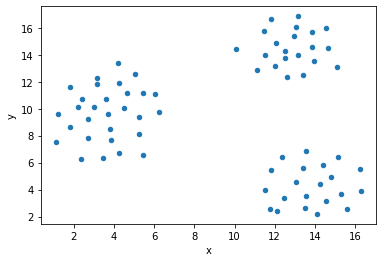

In [ ]:
dados1.plot(kind='scatter',x='x',y='y')

In [ ]:
def calcular_matriz_dissimilaridade(dados):
  M = np.zeros((len(dados),len(dados)))
  for i,row_i in dados.iterrows(): # para cada objeto i
      features_i = np.array(row_i) # atributos do objeto i
      for j,row_j in dados.iterrows(): # para cada objeto j
          features_j = np.array(row_j) # atributos do objeto j
          # calcula distância euclidiana
          euc = scipy.spatial.distance.euclidean(features_i, features_j)
          # armazena na posição M[i,j]
          M[i,j] = euc
  return M

In [ ]:
M = calcular_matriz_dissimilaridade(dados1)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:620: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


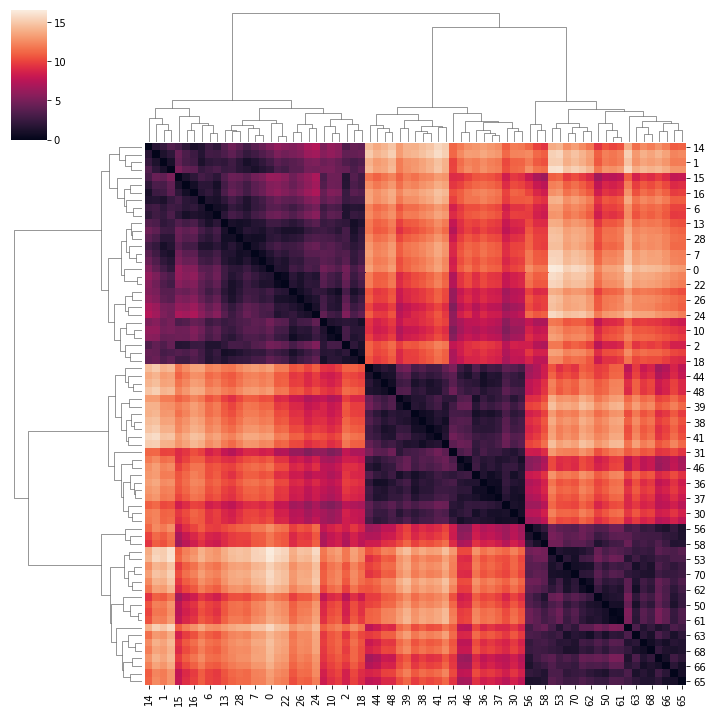

In [ ]:
sns.clustermap(M)  # average-link com distância euclidiana

## Exemplo 2

Vamos gerar um conjunto de dados aleatórios e analisar o agrupamento via inspeção visual.

In [ ]:
dados_random = pd.DataFrame(np.random.rand(300,2))
dados_random

,0,1
0,0.401307,0.677293
1,0.504421,0.572487
2,0.949187,0.692101
3,0.013225,0.265314
4,0.324857,0.371857
...,...,...
295,0.940608,0.083279
296,0.767112,0.945906
297,0.810323,0.127612
298,0.273827,0.776081


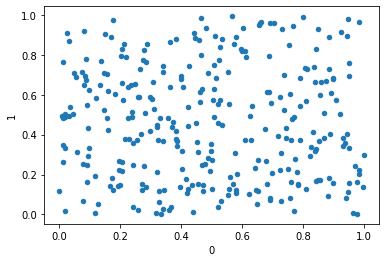

In [ ]:
dados_random.plot(kind='scatter',x=0,y=1)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:620: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


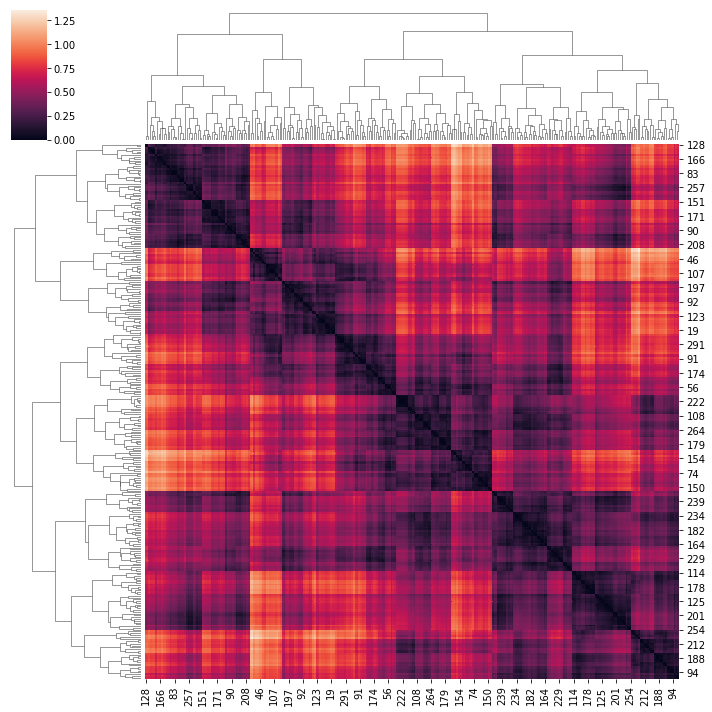

In [ ]:
M = calcular_matriz_dissimilaridade(dados_random)
sns.clustermap(M)  # average-link com distância euclidiana

# Índices de Validade Interna

## Erro Quadrático (k-Means)

Vamos analisar o erro quadrático do algoritmo k-means como índice de validade interna

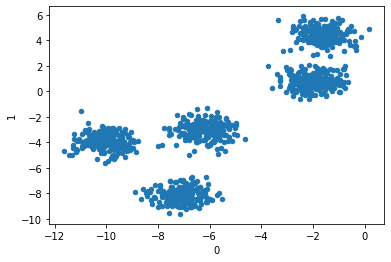

In [ ]:
dados1 = pd.read_csv('kmeans_exemplo1.csv')
dados1.plot(kind='scatter',x=0,y=1)

Testar diferentes valores de k = [2,50] e analisar o erro quadrático.

In [ ]:
L = []
for k in range(2,51): # variando de 2 até 51
  kmeans = KMeans(n_clusters=k,n_init=10,init='random',max_iter=300)
  kmeans.fit(dados1) # agrupando
  print('k=',k,'E=',kmeans.inertia_)
  L.append((k,kmeans.inertia_))

k= 2 E= 6618.074974542507
k= 3 E= 3621.1960856151545
k= 4 E= 2091.4717310124256
k= 5 E= 723.6781464843821
k= 6 E= 666.4286496981954
k= 7 E= 617.304325966132
k= 8 E= 574.2079745643315
k= 9 E= 526.0993417137737
k= 10 E= 496.3892702044914
k= 11 E= 434.21778677032785
k= 12 E= 429.2415483160281
k= 13 E= 378.63891510138603
k= 14 E= 361.94274035581276
k= 15 E= 327.91276105610376
k= 16 E= 316.31743766160116
k= 17 E= 316.0318047184648
k= 18 E= 281.15619655996375
k= 19 E= 286.2522274061194
k= 20 E= 259.07947002943075
k= 21 E= 241.1964635261188
k= 22 E= 231.31331271465612
k= 23 E= 229.86683529177117
k= 24 E= 220.60995665655463
k= 25 E= 206.75918428039176
k= 26 E= 206.76980815836998
k= 27 E= 195.22642307026436
k= 28 E= 183.08245304807178
k= 29 E= 184.2557956416662
k= 30 E= 178.13599293057223
k= 31 E= 169.20891373855798
k= 32 E= 168.36960937716304
k= 33 E= 161.13040905373316
k= 34 E= 156.29621929252448
k= 35 E= 154.86980381652774
k= 36 E= 148.9072759111893
k= 37 E= 142.99509891658022
k= 38 E= 141.8

In [ ]:
df_kmeans_e = pd.DataFrame(L)
df_kmeans_e.columns = ['k','E']
df_kmeans_e

,k,E
0,2,6618.074975
1,3,3621.196086
2,4,2091.471731
3,5,723.678146
4,6,666.428650
5,7,617.304326
6,8,574.207975
7,9,526.099342
8,10,496.389270
9,11,434.217787


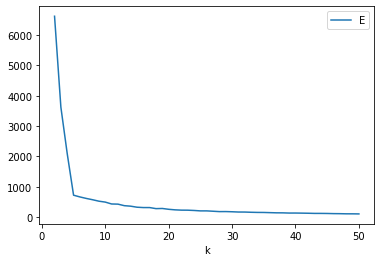

In [ ]:
df_kmeans_e.plot(kind='line',x='k',y='E')

## Correlação Cofenética

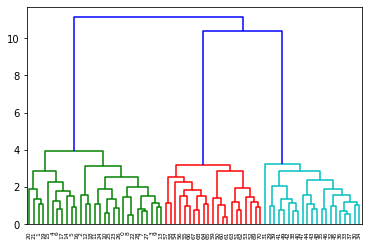

In [ ]:
dados1 = pd.read_csv('hc_exemplo1.csv')
M = pdist(dados1) # calcula matriz de dissimilaridade
Z = hierarchy.linkage(M, 'average')
dendrogram = hierarchy.dendrogram(Z)

Calculando a matriz cofenética.

In [ ]:
result = scipy.cluster.hierarchy.cophenet(Z,M)
print('Correlacao cofenetica = ',result[0])

Correlacao cofenetica =  0.9107645707031669


# Índice de Validade Relativa (Silhueta)

## Exemplo 1

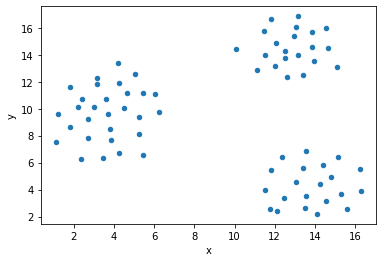

In [ ]:
dados1 = pd.read_csv('hc_exemplo1.csv')
dados1.plot(kind='scatter',x='x',y='y')

In [ ]:
kmeans = KMeans(n_clusters=3,n_init=10,init='random',max_iter=300)
kmeans.fit(dados1) # agrupando

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [ ]:
dados1['cluster'] = kmeans.labels_

Calculando o índice de silhueta para cada objeto

In [ ]:
dados1['silhueta'] = silhouette_samples(dados1, kmeans.labels_)
dados1

,x,y,cluster,silhueta
0,1.82,11.60,1,0.706256
1,1.82,8.65,1,0.760729
2,5.22,8.15,1,0.679002
3,3.62,10.75,1,0.760304
4,2.72,7.80,1,0.748050
...,...,...,...,...
66,14.42,5.80,0,0.730625
67,14.82,4.95,0,0.775605
68,14.27,4.40,0,0.807030
69,14.57,3.15,0,0.802860


In [ ]:
# calculando o valor de silhueta para todo o agrupamento
dados1.silhueta.mean()

0.7241973372156831

## Exemplo 2
Vamos estimar o número de clusters usando silhueta

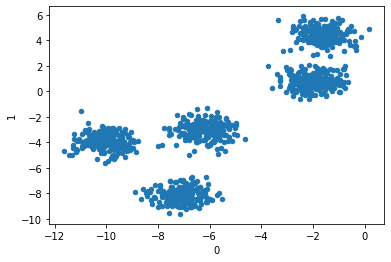

In [ ]:
dados1 = pd.read_csv('kmeans_exemplo1.csv')
dados1.plot(kind='scatter',x=0,y=1)

In [ ]:
L = []
for k in range(2,21): # variando de 2 até 20
  kmeans = KMeans(n_clusters=k,n_init=10,init='random',max_iter=300)
  kmeans.fit(dados1) # agrupando
  silhouette_avg = silhouette_score(dados1, kmeans.labels_)
  print('k=',k,'Silhueta=',silhouette_avg)
  L.append((k,silhouette_avg))

k= 2 Silhueta= 0.6742300583684507
k= 3 Silhueta= 0.6478976650894254
k= 4 Silhueta= 0.7035371308922472
k= 5 Silhueta= 0.7302051837625586
k= 6 Silhueta= 0.6475387229180203
k= 7 Silhueta= 0.5759343922411947
k= 8 Silhueta= 0.4774427705711134
k= 9 Silhueta= 0.48320698579025045
k= 10 Silhueta= 0.39133085722940975
k= 11 Silhueta= 0.40792872982384987
k= 12 Silhueta= 0.3946705288527181
k= 13 Silhueta= 0.32551372541530216
k= 14 Silhueta= 0.33347356001682205
k= 15 Silhueta= 0.3308497969080012
k= 16 Silhueta= 0.3360980480493102
k= 17 Silhueta= 0.33225230487787244
k= 18 Silhueta= 0.3428500890970598
k= 19 Silhueta= 0.3335950167306961
k= 20 Silhueta= 0.3236921435083778


In [ ]:
df_kmeans_silhueta = pd.DataFrame(L)
df_kmeans_silhueta.columns = ['k','silhueta']
df_kmeans_silhueta

,k,silhueta
0,2,0.674230
1,3,0.647898
2,4,0.703537
3,5,0.730205
4,6,0.647539
5,7,0.575934
6,8,0.477443
7,9,0.483207
8,10,0.391331
9,11,0.407929


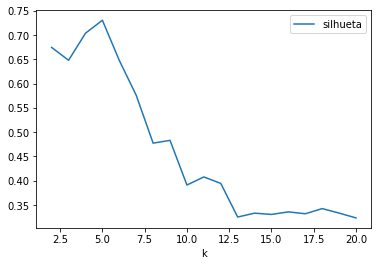

In [ ]:
df_kmeans_silhueta.plot(kind='line',x='k',y='silhueta')

## Exemplo 3

Vamos testar silhueta com dados aleatórios

k= 2 Silhueta= 0.38621656399155
k= 3 Silhueta= 0.4000571350106064
k= 4 Silhueta= 0.4288203051628893
k= 5 Silhueta= 0.4008912375139872
k= 6 Silhueta= 0.3774365503399619
k= 7 Silhueta= 0.38054284793353116
k= 8 Silhueta= 0.3804888750028882
k= 9 Silhueta= 0.37543297455701663
k= 10 Silhueta= 0.3808143682535806
k= 11 Silhueta= 0.38871648348922444
k= 12 Silhueta= 0.3815588808126743
k= 13 Silhueta= 0.36322476603698883
k= 14 Silhueta= 0.37196842900093813
k= 15 Silhueta= 0.3929524669951838
k= 16 Silhueta= 0.3756742766604567
k= 17 Silhueta= 0.37165692778724074
k= 18 Silhueta= 0.3685878726393709
k= 19 Silhueta= 0.3716841142628144


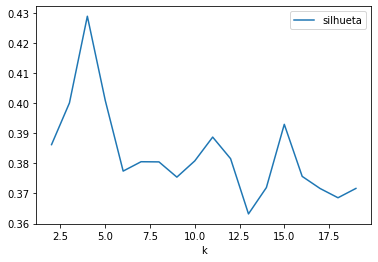

In [ ]:
dados_random = pd.DataFrame(np.random.rand(300,2))
L = []
for k in range(2,20): # variando de 2 até 20
  kmeans = KMeans(n_clusters=k,n_init=10,init='random',max_iter=300)
  kmeans.fit(dados_random) # agrupando
  silhouette_avg = silhouette_score(dados_random, kmeans.labels_)
  print('k=',k,'Silhueta=',silhouette_avg)
  L.append((k,silhouette_avg))

df_kmeans_silhueta = pd.DataFrame(L)
df_kmeans_silhueta.columns = ['k','silhueta']
df_kmeans_silhueta.plot(kind='line',x='k',y='silhueta')

# Índice de Validade Externa

Vamos usar o dataset Iris, que já possui informação de rótulo para cada objeto (tipo de flor).

Esse dataset já foi utilizado em outras partes do curso de ciência de dados!

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # vamos usar apenas dois atributos
y = iris.target

In [ ]:
df_iris = pd.DataFrame(X)
df_iris['label']=y
df_iris

,0,1,label
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


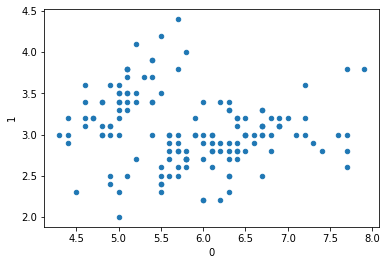

In [ ]:
df_iris.plot(kind='scatter',x=0,y=1)

In [ ]:
kmeans = KMeans(n_clusters=3,n_init=10,init='random',max_iter=300)
kmeans.fit(X) # agrupando

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=None,
       tol=0.0001, verbose=0)

In [ ]:
C = kmeans.labels_  # resultado do agrupamento
R = y  # organização de referência

In [ ]:
RAND = adjusted_rand_score(C,R)
print('RAND=',RAND)

RAND= 0.6006861021484542


# Informações complementares

A área de validação de agrupamento é tópico de pesquisa em aberto! Diferentes medidas ainda estão sendo propostas. Verifique outras medidas de validação de agrupamento.

https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation